# <span style="font-size: 150%;color:#783f04;background:#ffd966"> Walidacja modeli 1.9 [winequality-white.csv]

### <span style="color:blue"> Cognition comes by comparison! Friedrich Wilhelm Nietzsche
    
Modele cross-validated mogą być zgrane z dysku - jakość zgranych modeli zależy między innymi od wielkości próby na jakiej zostały przeszkolone. Jeżeli wgramy model szkolony na próbie 0.05 to gdy po zgraniu tych modeli z dysku ustawimy 0.05 populacji to otrzymamy identyczne wyniki na wskaźnikach. Czyli nagranie trzyma wyuczenie modeli. Natomiast można modele wyszkolić na próbie 0.5 a nastepnie wgrać i uruchomić na próbie 100%.     
 
## <span style="font-size: 100%;color:#6fa8dc;background:#cfe2f3">Ważne wnioski!!

## <span style="font-size: 100%;color:#6fa8dc;background:#cfe2f3">Modele cross-validated wyćwiczony na małej próbie z beznadziejnymi odczytami i parametrami, uruchomiony na pełnej próbie 100% zachowuje się znacznie lepiej. Dodatkowo zgranie zbagowanych wersji słabych modeli cross-validated z małej próby daje bardzo dobre rezultaty jeżeli chodzi o poprawę parametrów na wielkiej próbie 100%.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
from sklearn.ensemble import BaggingClassifier
from simple_colors import * 
from prettytable import PrettyTable
import time
import joblib

warnings.filterwarnings("ignore")

%matplotlib inline

df= pd.read_csv('/home/wojciech/Pulpit/1/winequality-white.csv')
print(df.shape)
print()
print(df.columns)
df.head(3)

(4898, 12)

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6


## <div class="alert-warning"> Cudowna formuła poprawiająca nazwy kolumn

In [2]:
import re
df = df.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))

## <div class="alert-success"> Sample reduction:</div>

In [3]:
df = df.sample(frac = 1.00, random_state=10) 
df.shape

(4898, 12)

#### Start pomiaru czasu

In [4]:
import time
start_time = time.time() ## pomiar czasu: start pomiaru czasu
print(time.ctime())

Sun Jun 21 20:59:59 2020


### Tool for automatic coding of discrete variables !


In [5]:
a,b = df.shape     #<- ile mamy kolumn
b

print('DISCRETE FUNCTIONS CODED')
print('------------------------')
for i in range(1,b):
    i = df.columns[i]
    f = df[i].dtypes
    if f == np.object:
        print(i,"---",f)   
    
        if f == np.object:
        
            df[i] = pd.Categorical(df[i]).codes
        
            continue

DISCRETE FUNCTIONS CODED
------------------------


In [6]:
df.fillna(7777, inplace=True)

## <div class="alert-success"> Ręczne ustawienie celu

In [7]:
target = 'quality'

In [8]:
X = df.drop(target, axis=1) 
y = df[target]  

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=123,stratify=y)

## Ustalamy strukturę próby 

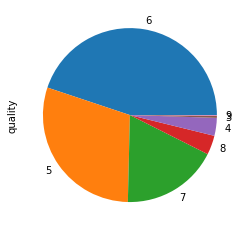

In [9]:
y.value_counts().plot(kind='pie')

In [10]:
y.value_counts()

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

In [11]:
y.unique()

array([6, 5, 8, 7, 4, 9, 3])

## SMOTE (technika nadpróbkowania mniejszości syntetycznej)
## SMOTE (Synthetic Minority Over-sampling Technique)

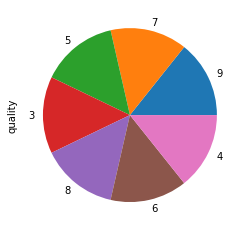

In [12]:
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler

smote = SMOTE('minority') 

ros = RandomOverSampler(random_state=148)
X_res, y_res = ros.fit_resample(X_test, y_test)
y_res.value_counts().plot(kind='pie')

In [13]:
print(X_train.shape, y_train.shape)

(3918, 11) (3918,)


In [14]:
print(X_res.shape, y_res.shape)

(3080, 11) (3080,)


In [15]:
X_train=X_res
y_train=y_res

In [16]:
print(X_train.shape, y_train.shape)

(3080, 11) (3080,)


In [17]:
y_train.value_counts()

9    440
7    440
5    440
3    440
8    440
6    440
4    440
Name: quality, dtype: int64

## <span style="font-size: 150%;color:#783f04;background:#ffd966"> SMOTE pełne dla cross validation

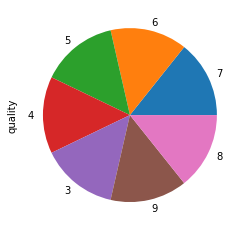

In [18]:
smote = SMOTE('minority') 

ros = RandomOverSampler(random_state=148)
Data, target = ros.fit_resample(X, y)
target.value_counts().plot(kind='pie')

In [19]:
target.value_counts()

7    2198
6    2198
5    2198
4    2198
3    2198
9    2198
8    2198
Name: quality, dtype: int64

## <div class="alert-success"> Sterowanie zakresu waluacji

In [20]:
Model1 = 1
Model2 = 0 
Model3 = 0 
Model4 = 0 
Model5 = 0 
Model6 = 0
Model7 = 0
Model8 = 0
Model9 = 0 
Model10 = 0
Model11 = 0 

### <span style="font-size: 110%;color:white;background:Red">Model 1 <span style="font-size: 110%;color:#6fa8dc;background:#cfe2f3">  Modele na ustawieniach fabrycznych


In [21]:
if Model1 < 1 :
    pass
else:
    
    SVM = joblib.load('/home/wojciech/Pulpit/7/model1-SVM.pkl')
    CBC = joblib.load('/home/wojciech/Pulpit/7/model1-CBC.pkl')
    XGB = joblib.load('/home/wojciech/Pulpit/7/model1-XGB.pkl')
    LGBM = joblib.load('/home/wojciech/Pulpit/7/model1-LGBM.pkl')
    KNN = joblib.load('/home/wojciech/Pulpit/7/model1-KNN.pkl')
    NBC = joblib.load('/home/wojciech/Pulpit/7/model1-NBC.pkl')
    LRE = joblib.load('/home/wojciech/Pulpit/7/model1-LRE.pkl')
    RFC = joblib.load('/home/wojciech/Pulpit/7/model1-RFC.pkl')
    GBC = joblib.load('/home/wojciech/Pulpit/7/model1-GBC.pkl')

classifiers_1 = [SVM,CBC,XGB,LGBM,KNN,NBC,LRE,RFC,GBC]
name1 = ['SVM','CBC','XGB','LGBM','KNN','NBC','LRE','RFC','GBC']

### <span style="font-size: 110%;color:white;background:Red">Model 2  <span style="font-size: 110%;color:#6fa8dc;background:#cfe2f3">  Modele na ustawieniach fabrycznych po bagging 


In [22]:
if Model2 < 1:
    pass
else:
    
    SVM_b = joblib.load('/home/wojciech/Pulpit/7/model2-SVM_b.pkl')
    CBC_b = joblib.load('/home/wojciech/Pulpit/7/model2-CBC_b.pkl')
    XGB_b = joblib.load('/home/wojciech/Pulpit/7/model2-XGB_b.pkl')
    LGBM_b = joblib.load('/home/wojciech/Pulpit/7/model2-LGBM_b.pkl')
    KNN_b = joblib.load('/home/wojciech/Pulpit/7/model2-KNN_b.pkl')
    NBC_b = joblib.load('/home/wojciech/Pulpit/7/model2-NBC_b.pkl')
    LRE_b = joblib.load('/home/wojciech/Pulpit/7/model2-LRE_b.pkl')
    RFC_b = joblib.load('/home/wojciech/Pulpit/7/model2-RFC_b.pkl')
    GBC_b = joblib.load('/home/wojciech/Pulpit/7/model2-GBC_b.pkl')

    classifiers_2 = [SVM_b,CBC_b,XGB_b,LGBM_b,KNN_b,NBC_b,LRE_b,RFC_b,GBC_b]
    name2 = ['SVM_b','CBC_b','XGB_b','LGBM_b','KNN_b','NBC_b','LRE_b','RFC_b','GBC_b']

### <span style="font-size: 110%;color:white;background:Red">Model 3  <span style="font-size: 110%;color:#6fa8dc;background:#cfe2f3">  Modele na ustawieniach fabrycznych po kalibracji

In [23]:
if Model3 < 1:
    pass
else:

    SVM3 = joblib.load('/home/wojciech/Pulpit/7/model3-SVM_c.pkl')
    CBC3 = joblib.load('/home/wojciech/Pulpit/7/model3-CBC_c.pkl')
    XGB3 = joblib.load('/home/wojciech/Pulpit/7/model3-XGB_c.pkl')
    LGBM3 = joblib.load('/home/wojciech/Pulpit/7/model3-LGBM_c.pkl')
    KNN3 = joblib.load('/home/wojciech/Pulpit/7/model3-KNN_c.pkl')
    NBC3 = joblib.load('/home/wojciech/Pulpit/7/model3-NBC_c.pkl')
    LRE3 = joblib.load('/home/wojciech/Pulpit/7/model3-LRE_c.pkl')
    RFC3 = joblib.load('/home/wojciech/Pulpit/7/model3-RFC_c.pkl')
    GBC3 = joblib.load('/home/wojciech/Pulpit/7/model3-GBC_c.pkl')

    classifiers_3 = [SVM3,CBC3,XGB3,LGBM3,KNN3,NBC3,LRE3,RFC3,GBC3]
    name3 = ['SVM3','CBC3','XGB3','LGBM3','KNN3','NBC3','LRE3','RFC3','GBC3']

### <span style="font-size: 110%;color:white;background:Red">Model 4  <span style="font-size: 110%;color:#6fa8dc;background:#cfe2f3">  Modele na ustawieniach fabrycznych po bagging i po kalibracji

In [24]:
if Model4 < 1:
    pass
else:

    SVM_b4 = joblib.load('/home/wojciech/Pulpit/7/model4-SVM_d.pkl')
    CBC_b4 = joblib.load('/home/wojciech/Pulpit/7/model4-CBC_d.pkl')
    XGB_b4 = joblib.load('/home/wojciech/Pulpit/7/model4-XGB_d.pkl')
    LGBM_b4 = joblib.load('/home/wojciech/Pulpit/7/model4-LGBM_d.pkl')
    KNN_b4 = joblib.load('/home/wojciech/Pulpit/7/model4-KNN_d.pkl')
    NBC_b4 = joblib.load('/home/wojciech/Pulpit/7/model4-NBC_d.pkl')
    LRE_b4 = joblib.load('/home/wojciech/Pulpit/7/model4-LRE_d.pkl')
    RFC_b4 = joblib.load('/home/wojciech/Pulpit/7/model4-RFC_d.pkl')
    GBC_b4 = joblib.load('/home/wojciech/Pulpit/7/model4-GBC_d.pkl')

    classifiers_4 = [SVM_b4,CBC_b4,XGB_b4,LGBM_b4,KNN_b4,NBC_b4,LRE_b4,RFC_b4,GBC_b4]
    name4 = ['SVM_b4','CBC_b4','XGB_b4','LGBM_b4','KNN_b4','NBC_b4','LRE_b4','RFC_b4','GBC_b4']

### <span style="font-size: 110%;color:white;background:Red">Model 5  <span style="font-size: 110%;color:#6fa8dc;background:#cfe2f3">  Modele na cross-validation

### <span style="font-size: 110%;color:white;background:Red">Model 6 <span style="font-size: 110%;color:#6fa8dc;background:#cfe2f3"> Modele na ustawieniach optymalnych po bagging

In [25]:
if Model6 < 1:
    pass
else:

    SVM6 = joblib.load('/home/wojciech/Pulpit/7/model6-SVM_w.pkl')
    SVM26 = joblib.load('/home/wojciech/Pulpit/7/model6-SVM2_w.pkl')
    CBC6 = joblib.load('/home/wojciech/Pulpit/7/model6-CBC_w.pkl')
    XGB6 = joblib.load('/home/wojciech/Pulpit/7/model6-XGB_w.pkl')
    LGBM6 = joblib.load('/home/wojciech/Pulpit/7/model6-LGBM_w.pkl')
    NBC6 = joblib.load('/home/wojciech/Pulpit/7/model6-NBC_w.pkl')
    LRE6 = joblib.load('/home/wojciech/Pulpit/7/model6-LRE_w.pkl')
    RFC6 = joblib.load('/home/wojciech/Pulpit/7/model6-RFC_w.pkl')
    RFC26 = joblib.load('/home/wojciech/Pulpit/7/model6-RFC2_w.pkl')

    classifiers_6 = [SVM6,SVM26,CBC6,XGB6,LGBM6,NBC6,LRE6,RFC6,RFC26]
    name6= ['SVM6','SVM26','CBC6','XGB6','LGBM6','NBC6','LRE6','RFC6','RFC26']

### <span style="font-size: 110%;color:white;background:Red">Model 7 <span style="font-size: 110%;color:#6fa8dc;background:#cfe2f3">  Modele na ustawieniach optymalnych

In [26]:
if Model7 < 1:
    pass
else:

    SVM7 = joblib.load('/home/wojciech/Pulpit/7/model7-SVM_o.pkl')
    SVM27 = joblib.load('/home/wojciech/Pulpit/7/model7-SVM2_o.pkl')
    CBC7 = joblib.load('/home/wojciech/Pulpit/7/model7-CBC_o.pkl')
    XGB7 = joblib.load('/home/wojciech/Pulpit/7/model7-XGB_o.pkl')
    LGBM7 = joblib.load('/home/wojciech/Pulpit/7/model7-LGBM_o.pkl')
    NBC7 = joblib.load('/home/wojciech/Pulpit/7/model7-NBC_o.pkl')
    LRE7 = joblib.load('/home/wojciech/Pulpit/7/model7-LRE_o.pkl')
    RFC7 = joblib.load('/home/wojciech/Pulpit/7/model7-RFC_o.pkl')
    RFC27 = joblib.load('/home/wojciech/Pulpit/7/model7-RFC2_o.pkl')

    classifiers_7 = [SVM7,SVM27,CBC7,XGB7,LGBM7,NBC7,LRE7,RFC7,RFC27]
    name7 = ['SVM7','SVM27','CBC7','XGB7','LGBM7','NBC7','LRE7','RFC7','RFC27']

### <span style="font-size: 110%;color:white;background:Red">Model 8 <span style="font-size: 110%;color:#6fa8dc;background:#cfe2f3">   Modele na ustawieniach optymalnych po boosting, n=3 

In [27]:
if Model8 < 1:
    pass
else:
    
    SVM8 = joblib.load('/home/wojciech/Pulpit/7/model8-SVM_v.pkl')
    SVM28 = joblib.load('/home/wojciech/Pulpit/7/model8-SVM2_v.pkl')
    CBC8 = joblib.load('/home/wojciech/Pulpit/7/model8-CBC_v.pkl')
    XGB8 = joblib.load('/home/wojciech/Pulpit/7/model8-XGB_v.pkl')
    LGBM8 = joblib.load('/home/wojciech/Pulpit/7/model8-LGBM_v.pkl')
    NBC8 = joblib.load('/home/wojciech/Pulpit/7/model8-NBC_v.pkl')
    LRE8 = joblib.load('/home/wojciech/Pulpit/7/model8-LRE_v.pkl')
    RFC8 = joblib.load('/home/wojciech/Pulpit/7/model8-RFC_v.pkl')
    RFC28 = joblib.load('/home/wojciech/Pulpit/7/model8-RFC2_v.pkl')

    classifiers_8 = [SVM8,SVM28,CBC8,XGB8,LGBM8,NBC8,LRE8,RFC8,RFC28]
    name8 = ['SVM8','SVM28','CBC8','XGB8','LGBM8','NBC8','LRE8','RFC8','RFC28']

### <span style="font-size: 110%;color:white;background:Red">Model 9 <span style="font-size: 110%;color:#6fa8dc;background:#cfe2f3">    Modele na ustawieniach optymalnych po boosting n=10 

In [28]:
if Model9 < 1:
    pass
else:

    SVM9 = joblib.load('/home/wojciech/Pulpit/7/model9-SVM_s.pkl')
    SVM29 = joblib.load('/home/wojciech/Pulpit/7/model9-SVM2_s.pkl')
    CBC9 = joblib.load('/home/wojciech/Pulpit/7/model9-CBC_s.pkl')
    XGB9 = joblib.load('/home/wojciech/Pulpit/7/model9-XGB_s.pkl')
    LGBM9 = joblib.load('/home/wojciech/Pulpit/7/model9-LGBM_s.pkl')
    NBC9 = joblib.load('/home/wojciech/Pulpit/7/model9-NBC_s.pkl')
    LRE9 = joblib.load('/home/wojciech/Pulpit/7/model9-LRE_s.pkl')
    RFC9 = joblib.load('/home/wojciech/Pulpit/7/model9-RFC_s.pkl')
    RFC29 = joblib.load('/home/wojciech/Pulpit/7/model9-RFC2_s.pkl')

    classifiers_9 = [SVM9,SVM29,CBC9,XGB9,LGBM9,NBC9,LRE9,RFC9,RFC29]
    name9 = ['SVM9','SVM29','CBC9','XGB9','LGBM9','NBC9','LRE9','RFC9','RFC28']

### <span style="font-size: 110%;color:white;background:Red">Model 10 <span style="font-size: 110%;color:#6fa8dc;background:#cfe2f3">   Modele na ustawieniach optymalnych po kalibracji (method='isotonic')

In [29]:
if Model10 < 1:
    pass
else:
    
    SVM10 = joblib.load('/home/wojciech/Pulpit/7/model10-SVM_q.pkl')
    SVM210 = joblib.load('/home/wojciech/Pulpit/7/model10-SVM2_q.pkl')
    CBC10 = joblib.load('/home/wojciech/Pulpit/7/model10-CBC_q.pkl')
    XGB10 = joblib.load('/home/wojciech/Pulpit/7/model10-XGB_q.pkl')
    LGBM10 = joblib.load('/home/wojciech/Pulpit/7/model10-LGBM_q.pkl')
    NBC10 = joblib.load('/home/wojciech/Pulpit/7/model10-NBC_q.pkl')
    LRE10 = joblib.load('/home/wojciech/Pulpit/7/model10-LRE_q.pkl')
    RFC10 = joblib.load('/home/wojciech/Pulpit/7/model10-RFC_q.pkl')
    RFC210 = joblib.load('/home/wojciech/Pulpit/7/model10-RFC2_q.pkl')

    classifiers_10 = [SVM10,SVM210,CBC10,XGB10,LGBM10,NBC10,LRE10,RFC10,RFC210]
    name10 = ['SVM10','SVM210','CBC10','XGB10','LGBM10','NBC10','LRE10','RFC10','RFC210']

### <span style="font-size: 110%;color:white;background:Red">Model 11 <span style="font-size: 110%;color:#6fa8dc;background:#cfe2f3">   Modele na ustawieniach optymalnych po kalibracji (method='sigmoid')

In [30]:
if Model11 < 1:
    pass
else:

    SVM11 = joblib.load('/home/wojciech/Pulpit/7/model11-SVM_y.pkl')
    SVM211 = joblib.load('/home/wojciech/Pulpit/7/model11-SVM2_y.pkl')
    CBC11 = joblib.load('/home/wojciech/Pulpit/7/model11-CBC_y.pkl')
    XGB11 = joblib.load('/home/wojciech/Pulpit/7/model11-XGB_y.pkl')
    LGBM11 = joblib.load('/home/wojciech/Pulpit/7/model11-LGBM_y.pkl')
    NBC11 = joblib.load('/home/wojciech/Pulpit/7/model11-NBC_y.pkl')
    LRE11 = joblib.load('/home/wojciech/Pulpit/7/model11-LRE_y.pkl')
    RFC11 = joblib.load('/home/wojciech/Pulpit/7/model11-RFC_y.pkl')
    RFC211 = joblib.load('/home/wojciech/Pulpit/7/model11-RFC2_y.pkl')

    classifiers_11 = [SVM11,SVM211,CBC11,XGB11,LGBM11,NBC11,LRE11,RFC11,RFC211]
    name11 = ['SVM11','SVM211','CBC11','XGB11','LGBM11','NBC11','LRE11','RFC11','RFC211']

### Gdzie zapisywane będą modele

In [31]:
csv1 ='/home/wojciech/Pulpit/7/model1.csv'  #<=  modele na ustawieniach fabrycznych
csv2 ='/home/wojciech/Pulpit/7/model2.csv'  #<=  modele na ustawieniach fabrycznych po bagging
csv3 ='/home/wojciech/Pulpit/7/model3.csv'  #<=  modele na ustawieniach fabrycznych po kalibracji
csv4 ='/home/wojciech/Pulpit/7/model4.csv'  #<=  modele na ustawieniach fabrycznych po bagging po kalibracji
csv5 ='/home/wojciech/Pulpit/7/model5.csv'  #<=  modele na cross-validation
csv6 ='/home/wojciech/Pulpit/7/model6.csv'  #<=  modele na ustawieniach optymalnych po bagging
csv7 ='/home/wojciech/Pulpit/7/model7.csv'  ##<=  modele na ustawieniach optymalnych 
csv8 ='/home/wojciech/Pulpit/7/model8.csv'  ##<=  modele na ustawieniach optymalnych po boosting n=3
csv9 ='/home/wojciech/Pulpit/7/model9.csv'  ##<=  modele na ustawieniach optymalnych po boosting n=10
csv10 ='/home/wojciech/Pulpit/7/model10.csv'  ##<=  modele na ustawieniach optymalnych po kalibracji (method='isotonic')
csv11 ='/home/wojciech/Pulpit/7/model11.csv'  ##<=  modele na ustawieniach optymalnych po kalibracji (method='sigmoid')

## <span style="font-size: 150%;color:#783f04;background:#ffd966"> Nowy system oceny globalnej modeli klasyfikacji wieloklasowej

In [32]:
def Multi_valuator(classifiers,names, X_test,y_test,adres):
    
    def kot(model,name, X_test,y_test,n): 
        from sklearn.metrics import confusion_matrix
        M = confusion_matrix(y_test, model.predict(X_test))
    
        d = y_test.unique()
        class_name = list(d.flatten())
       
        
        global dfv
    
        def sumoflist(l):    
            total = 0    
            for i in l:
                total +=i
            return total
    
            # Przekątna macierzy:
        import numpy as np
        w = M.diagonal()
        w = list(w.flatten())
        TN = w[n]
   
        # Suma wierszy macierzy:
        sumR = M.sum(axis=1)
        sumR = list(sumR.flatten())
        FP = sumR[n]-TN
    
        # Suma kolumn macierzy:
        sumC = M.sum(axis=0) 
        sumC = list(sumC.flatten())
        FN = sumC[n]-TN
        TP = sumoflist(w) - TN
    
        Recall = np.round(TP/(TP+FN),decimals=3)
        Precision = np.round(TP/(TP+FP),decimals=3)
        F1 = np.round((2*(Precision*Recall))/(Precision+Recall),decimals=3)
        FPR = np.round(FP/(FP + TN),decimals=3)
        TPR = np.round(TP/(TP + FN),decimals=3)
        FNR = np.round(FN/(TP + FN),decimals=3)
        SPEC = np.round(TN/(TN + FP),decimals=3)
       
        #return TN, FN, TP, FP, F1, Recall, Precision, FPR,TPR,FNR,SPEC
        dfv = pd.DataFrame({'Model':name,'Class:':n,'Recall:': [Recall], 'Precision:': [Precision], 'F1:':[F1],'FPR':[FPR],'TPR':[TPR],'FNR':[FNR],'SPEC':[SPEC]})

        return    dfv 

#-------------------------------------------    
    import time
    start_time = time.time() 
    
    #adres = '/home/wojciech/Pulpit/7/model1.csv' 
    appended_data = []
    
    d = y_test.unique()   #<= obliczam ile jest klas do sprawdzenia
    d = len(d)
    q = list(range(d))
    
    for k,g in zip(classifiers,names):
        for t in q:                                         # każdą klase robi oddzielnie
            results = kot(k,g, X_test,y_test,t)
            appended_data.append(results)
    appended_data = pd.concat(appended_data)
    filename =  adres                                         #.format(n)
    appended_data.to_csv(filename)
    p = np.round((time.time() - start_time),decimals=1)
    print(blue(adres),p,"---",time.ctime())    

## <span style="font-size: 170%;color:#783f04;background:#ffd966"> Tworzenie pliku dla wszystkich modeli

In [33]:
 Valuator = [] 

if Model1 < 1:
    pass
else:    
    Multi_valuator(classifiers_1 ,name1, X_test,y_test,csv1)
    df_1 = pd.read_csv('/home/wojciech/Pulpit/7/model1.csv')
    df_1['comment'] = 'Modele na ustawieniach fabrycznych'
    Valuator = pd.concat([df_1], sort=True).sort_values(['FPR','TPR'],ascending=[True,False]) 
    
if Model2 < 1:
    pass
else:        
    Multi_valuator(classifiers_2 ,name2, X_test,y_test,csv2)
    df_2 = pd.read_csv('/home/wojciech/Pulpit/7/model2.csv')
    df_2['comment'] = 'Modele na ustawieniach fabrycznych po bagging'
    Valuator = pd.concat([df_1,df_2], sort=True).sort_values(['FPR','TPR'],ascending=[True,False]) 
    
if Model3 < 1:
    pass
else:    
    Multi_valuator(classifiers_3 ,name3, X_test,y_test,csv3)
    df_3 = pd.read_csv('/home/wojciech/Pulpit/7/model3.csv')
    df_3['comment'] = 'Modele na ustawieniach fabrycznych po kalibracji'
    Valuator = pd.concat([df_1,df_2,df_3], sort=True).sort_values(['FPR','TPR'],ascending=[True,False]) 
    
    
if Model4 < 1:
    pass
else:    
    Multi_valuator(classifiers_4 ,name4, X_test,y_test,csv4)
    df_4 = pd.read_csv('/home/wojciech/Pulpit/7/model4.csv')
    df_4['comment'] = 'Modele na ustawieniach fabrycznych po bagging po kalibracji'
    Valuator = pd.concat([df_1,df_2,df_3,df_4], sort=True).sort_values(['FPR','TPR'],ascending=[True,False]) 
    
    
#if Model5 < 1:
#    pass
#else:    
#    Multi_valuator(classifiers_5 ,name5, y_test,X_test,csv5)
#    df_5 = pd.read_csv('/home/wojciech/Pulpit/7/model5.csv')
#    df_5['comment'] = 'Modele na cross-validation'
#    Valuator = pd.concat([df_1,df_2,df_3,df_4,df_5], sort=True).sort_values(['FPR','TPR'],ascending=[True,False]) 
    
if Model6 < 1:
    pass
else:    
    Multi_valuator(classifiers_6 ,name6, X_test,y_test,csv6)
    df_6 = pd.read_csv('/home/wojciech/Pulpit/7/model6.csv')
    df_6['comment'] = 'Modele na ustawieniach optymalnych po bagging'
    Valuator = pd.concat([df_1,df_2,df_3,df_4,df_6], sort=True).sort_values(['FPR','TPR'],ascending=[True,False]) 
    
if Model7 < 1:
    pass
else:      
    Multi_valuator(classifiers_7 ,name7, X_test,y_test,csv7)
    df_7 = pd.read_csv('/home/wojciech/Pulpit/7/model7.csv')
    df_7['comment'] = 'Modele na ustawieniach optymalnych'
    Valuator = pd.concat([df_1,df_2,df_3,df_4,df_6,df_7], sort=True).sort_values(['FPR','TPR'],ascending=[True,False]) 
    
if Model8 < 1:
    pass
else:    
    Multi_valuator(classifiers_8 ,name8, X_test,y_test,csv8)
    df_8 = pd.read_csv('/home/wojciech/Pulpit/7/model8.csv')
    df_8['comment'] = 'Modele na ustawieniach optymalnych po boosting n=3'
    Valuator = pd.concat([df_1,df_2,df_3,df_4,df_6,df_7,df_8], sort=True).sort_values(['FPR','TPR'],ascending=[True,False]) 
    
if Model9 < 1:
    pass
else:    
    Multi_valuator(classifiers_9 ,name9, X_test,y_test,csv9)
    df_9 = pd.read_csv('/home/wojciech/Pulpit/7/model9.csv')
    df_9['comment'] = 'Modele na ustawieniach optymalnych po boosting n=10'
    Valuator = pd.concat([df_1,df_2,df_3,df_4,df_6,df_7,df_8,df_9], sort=True).sort_values(['FPR','TPR'],ascending=[True,False]) 
    
if Model10 < 1:
    pass
else:    
    Multi_valuator(classifiers_10 ,name10, X_test,y_test,csv10)
    df_10 = pd.read_csv('/home/wojciech/Pulpit/7/model10.csv')
    df_10['comment'] = 'Modele na ustawieniach optymalnych po kalibracji (method= isotonic)'
    Valuator = pd.concat([df_1,df_2,df_3,df_4,df_6,df_7,df_8,df_9,df_10], sort=True).sort_values(['FPR','TPR'],ascending=[True,False]) 
    
if Model11 < 1:
    pass
else:    
    Multi_valuator(classifiers_11 ,name11, X_test,y_test,csv11)
    df_11 = pd.read_csv('/home/wojciech/Pulpit/7/model11.csv')
    df_11['comment'] = 'Modele na ustawieniach optymalnych po kalibracji (method= sigmoid )'
    Valuator = pd.concat([df_1,df_2,df_3,df_4,df_6,df_7,df_8,df_9,df_10,df_11], sort=True).sort_values(['FPR','TPR'],ascending=[True,False]) 

/home/wojciech/Pulpit/7/model1.csv 3.1 --- Sun Jun 21 21:00:04 2020


In [34]:
Valuator

,Class:,F1:,FNR,FPR,Model,Precision:,Recall:,SPEC,TPR,Unnamed: 0,comment
42,0,0.707,0.452,0.250,LRE,0.994,0.548,0.750,0.548,0,Modele na ustawieniach fabrycznych
52,3,0.695,0.320,0.307,RFC,0.711,0.680,0.693,0.680,0,Modele na ustawieniach fabrycznych
51,2,0.823,0.182,0.309,RFC,0.829,0.818,0.691,0.818,0,Modele na ustawieniach fabrycznych
17,3,0.666,0.360,0.318,XGB,0.694,0.640,0.682,0.640,0,Modele na ustawieniach fabrycznych
24,3,0.682,0.328,0.330,LGBM,0.692,0.672,0.670,0.672,0,Modele na ustawieniach fabrycznych
...,...,...,...,...,...,...,...,...,...,...,...
41,6,0.998,0.000,1.000,NBC,0.997,1.000,0.000,1.000,0,Modele na ustawieniach fabrycznych
55,6,0.999,0.000,1.000,RFC,0.998,1.000,0.000,1.000,0,Modele na ustawieniach fabrycznych
62,6,0.998,0.002,1.000,GBC,0.998,0.998,0.000,0.998,0,Modele na ustawieniach fabrycznych
48,6,0.806,0.322,1.000,LRE,0.995,0.678,0.000,0.678,0,Modele na ustawieniach fabrycznych


In [35]:
del Valuator['Unnamed: 0']

In [36]:
Valuator

,Class:,F1:,FNR,FPR,Model,Precision:,Recall:,SPEC,TPR,comment
42,0,0.707,0.452,0.250,LRE,0.994,0.548,0.750,0.548,Modele na ustawieniach fabrycznych
52,3,0.695,0.320,0.307,RFC,0.711,0.680,0.693,0.680,Modele na ustawieniach fabrycznych
51,2,0.823,0.182,0.309,RFC,0.829,0.818,0.691,0.818,Modele na ustawieniach fabrycznych
17,3,0.666,0.360,0.318,XGB,0.694,0.640,0.682,0.640,Modele na ustawieniach fabrycznych
24,3,0.682,0.328,0.330,LGBM,0.692,0.672,0.670,0.672,Modele na ustawieniach fabrycznych
...,...,...,...,...,...,...,...,...,...,...
41,6,0.998,0.000,1.000,NBC,0.997,1.000,0.000,1.000,Modele na ustawieniach fabrycznych
55,6,0.999,0.000,1.000,RFC,0.998,1.000,0.000,1.000,Modele na ustawieniach fabrycznych
62,6,0.998,0.002,1.000,GBC,0.998,0.998,0.000,0.998,Modele na ustawieniach fabrycznych
48,6,0.806,0.322,1.000,LRE,0.995,0.678,0.000,0.678,Modele na ustawieniach fabrycznych


In [37]:
df5 = pd.pivot_table(Valuator, index=['Model','comment'], values=['Recall:','Precision:','F1:','FPR','TPR','FNR','SPEC'],aggfunc=[np.mean])
df5

mean                      \
                                               F1:       FNR       FPR   
Model comment                                                            
CBC   Modele na ustawieniach fabrycznych  0.899000  0.100714  0.548000   
GBC   Modele na ustawieniach fabrycznych  0.887429  0.112429  0.543143   
KNN   Modele na ustawieniach fabrycznych  0.874714  0.125286  0.587714   
LGBM  Modele na ustawieniach fabrycznych  0.901857  0.097714  0.543286   
LRE   Modele na ustawieniach fabrycznych  0.592714  0.409143  0.691000   
NBC   Modele na ustawieniach fabrycznych  0.767714  0.232571  0.652857   
RFC   Modele na ustawieniach fabrycznych  0.906714  0.092857  0.545000   
SVM   Modele na ustawieniach fabrycznych  0.603000  0.384571  0.727857   
XGB   Modele na ustawieniach fabrycznych  0.900143  0.099000  0.544143   

                                                                         \
                                         Precision:   Recall:      SPEC   
Model comment                                                             
CBC   Modele na ustawieniach fabrycznych   0.899143  0.899286  0.452000   
GBC   Modele na ustawieniach fabrycznych   0.889429  0.887571  0.456857   
KNN   Modele na ustawieniach fabrycznych   0.874857  0.874714  0.412286   
LGBM  Modele na ustawieniach fabrycznych   0.901714  0.902286  0.456714   
LRE   Modele na ustawieniach fabrycznych   0.698000  0.590857  0.309000   
NBC   Modele na ustawieniach fabrycznych   0.795714  0.767429  0.347143   
RFC   Modele na ustawieniach fabrycznych   0.907000  0.907143  0.455000   
SVM   Modele na ustawieniach fabrycznych   0.695857  0.615429  0.272143   
XGB   Modele na ustawieniach fabrycznych   0.900143  0.901000  0.455857   

                                                    
                                               TPR  
Model comment                                       
CBC   Modele na ustawieniach fabrycznych  0.899286  
GBC   Modele na ustawieniach fabrycznych  0.887571  
KNN   Modele na ustawieniach fabrycznych  0.874714  
LGBM  Modele na ustawieniach fabrycznych  0.902286  
LRE   Modele na ustawieniach fabrycznych  0.590857  
NBC   Modele na ustawieniach fabrycznych  0.767429  
RFC   Modele na ustawieniach fabrycznych  0.907143  
SVM   Modele na ustawieniach fabrycznych  0.615429  
XGB   Modele na ustawieniach fabrycznych  0.901000

In [38]:
df5.columns

MultiIndex([('mean',        'F1:'),
            ('mean',        'FNR'),
            ('mean',        'FPR'),
            ('mean', 'Precision:'),
            ('mean',    'Recall:'),
            ('mean',       'SPEC'),
            ('mean',        'TPR')],
           )

In [39]:
df5.columns =['Recall:','Precision:','F1:','FPR','TPR','FNR','SPEC']
df5.reset_index
df5.columns

Index(['Recall:', 'Precision:', 'F1:', 'FPR', 'TPR', 'FNR', 'SPEC'], dtype='object')

In [40]:
#df5.reset_index

In [41]:
from simple_colors import *

print(red('False_Positive_Rate','bold'),red('procentowy udział ludzi zdrowych uznanych przez model za chorych w populacji ludzi zdrowych','italic'))
print(red('True_Positive_Rate RECALL','bold'), red('procentowy udział chorych dobrze zdiagnozowanych w populacji ludzi chorych ogółem','italic'))
print(black('False_Negative_Rate','bold'), black('procentowy udział niewykrytych chorych w populacji ludzi chorych ogółem','italic'))
print(black('Specifity','bold'), black('procentowy udział ludzi zdrowych uznanych za zdrowych w populacji ludzi zdrowych','italic'))
#df5[['Model', 'comment','TPR','FPR']]
best = df5[(df5['Recall:']>0.75) &(df5['FPR']<0.90)]
best = best[['Recall:','FPR']]
best

False_Positive_Rate procentowy udział ludzi zdrowych uznanych przez model za chorych w populacji ludzi zdrowych
True_Positive_Rate RECALL procentowy udział chorych dobrze zdiagnozowanych w populacji ludzi chorych ogółem
False_Negative_Rate procentowy udział niewykrytych chorych w populacji ludzi chorych ogółem
Specifity procentowy udział ludzi zdrowych uznanych za zdrowych w populacji ludzi zdrowych


,,Recall:,FPR
Model,comment,,
CBC,Modele na ustawieniach fabrycznych,0.899000,0.899143
GBC,Modele na ustawieniach fabrycznych,0.887429,0.889429
KNN,Modele na ustawieniach fabrycznych,0.874714,0.874857
NBC,Modele na ustawieniach fabrycznych,0.767714,0.795714


In [42]:
best.index.to_list()

[('CBC', 'Modele na ustawieniach fabrycznych'),
 ('GBC', 'Modele na ustawieniach fabrycznych'),
 ('KNN', 'Modele na ustawieniach fabrycznych'),
 ('NBC', 'Modele na ustawieniach fabrycznych')]

In [43]:
stop

NameError: name 'stop' is not defined

## <div class="alert-danger"> Wybieramy manualnie modele do walidacji

In [44]:
clasifier_VAL = [SVM,CBC,XGB,LGBM,KNN,NBC,LRE,RFC,GBC]
name_VAL = ['SVM','CBC','XGB','LGBM','KNN','NBC','LRE','RFC','GBC']

## <span style="font-size: 150%;color:#6fa8dc;background:#cfe2f3">Models Valuation

## <span style="font-size: 150%;color:#783f04;background:#ffd966">Recall - Precision!

In [ ]:
def Recall_Precision(six_classifiers,name, X_train, y_train,X_test,y_test,calibration=True):

    from sklearn.datasets import make_classification
    from sklearn.calibration import CalibratedClassifierCV, calibration_curve  
    
    import numpy as np
    import matplotlib.pyplot as plt
    from sklearn import metrics
    from sklearn.metrics import classification_report, confusion_matrix
    from sklearn.metrics import confusion_matrix, log_loss, auc, roc_curve, roc_auc_score, recall_score, precision_recall_curve
    from sklearn.metrics import make_scorer, precision_score, fbeta_score, f1_score, classification_report
    from sklearn.metrics import accuracy_score
    from mlxtend.plotting import plot_learning_curves
    from prettytable import PrettyTable
    import time   
    
    start_time = time.time()
    
    #for cls in six_classifiers:
    #    cls.fit(X_train, y_train)
      
    
    Recall_Training = ['Recall Training: ']
    Precision_Training = ['Precision Training: ']
    Recall_Test= ['Recall Test: ']
    Precision_Test = ['Precision Test: ']
    
    CAL_Recall_Training = ['CAL_Recall Training: ']
    CAL_Precision_Training = ['CAL_Precision Training: ']
    CAL_Recall_Test= ['CAL_Recall Test: ']
    CAL_Precision_Test = ['CAL_Precision Test: ']   

    def compute_metric2(model):
        
        Recall_Training = np.round(recall_score(y_train, model.predict(X_train),average='macro'), decimals=3)
        Precision_Training = np.round(precision_score(y_train, model.predict(X_train), average='macro'), decimals=3)
        Recall_Test = np.round(recall_score(y_test, model.predict(X_test),average='macro'), decimals=3) 
        Precision_Test = np.round(precision_score(y_test, model.predict(X_test), average='macro'), decimals=3)
        
        return Recall_Training, Precision_Training, Recall_Test, Precision_Test
    
    for cls in six_classifiers:

        results = compute_metric2(cls)
        Recall_Training.append(results[0])
        Precision_Training.append(results[1])
        Recall_Test.append(blue(results[2],'bold'))
        Precision_Test.append((blue(results[3],'bold')))
   
    
    t = PrettyTable(['Name', name[0],name[1],name[2],name[3],name[4],name[5],name[6],name[7],name[8]])
    t.add_row(Recall_Training)
    t.add_row(Precision_Training)
    t.add_row(Recall_Test)
    t.add_row(Precision_Test)

    
    print(blue('Models before calibration','bold'))
    g = (time.time() - start_time)
    g = np.round(g)
    print('time: %s seconds' % g)
    print(t)
    
  ### ---------------------------------------------------------  
    
    
    if calibration != True:
        print()
    else:    
        print(blue('Models after calibration','bold'))

            
        
    print(blue('Wskaźniki pokazują RECALL i PRECISION dla klasy 1','bold'))
    print(blue('RECALL', 'bold'), blue('procentowy udział chorych dobrze zdiagnozowanych wśród wszystkich ludzi chorych','italic'))
    print(blue('PRECISION', 'bold'), blue('procentowy udział chorych dobrze zdiagnozowanych w populacji ludzi zdiagnozowanych fałszywie (zdrowych uznanych przez model za chorych) i dobrze zdiagnozowanych (chorych uznanych przez model za chorych)','italic'))

In [ ]:
Recall_Precision(clasifier_VAL,name_VAL, X_train, y_train,X_test,y_test,calibration=False)

## <span style="font-size: 150%;color:#783f04;background:#ffd966">Confusion matrix

In [ ]:
def confusion_matrix(six_classifiers,name, X_train, y_train,X_test,y_test,calibration=True):
    
    from matplotlib import rcParams
    rcParams['axes.titlepad'] = 20 
    
    from sklearn.calibration import CalibratedClassifierCV, calibration_curve 
    from sklearn.metrics import plot_confusion_matrix
    
    #for cls in six_classifiers:
    #    cls.fit(X_train, y_train) 
    
    fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(14,10))
    target_names = ['6','7','5','8','4','3','9']


    for t,cls, ax in zip(name, six_classifiers, axes.flatten()):
        plot_confusion_matrix(cls, 
                              X_test, 
                              y_test, 
                              ax=ax, 
                              cmap='Blues',
                             display_labels=target_names,values_format='')
        ax.title.set_text(type(cls).__name__)
        ax.title.set_color('blue')
        ax.text(-0.5, -0.56, t,fontsize=12)
        
        
    plt.tight_layout()  
    plt.show()

In [ ]:
confusion_matrix(clasifier_VAL,name_VAL, X_train, y_train,X_test,y_test,calibration=False)

## <span style="font-size: 150%;color:#783f04;background:#ffd966">Indywidualna ocena wybranego modelu

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import confusion_matrix, log_loss, auc, roc_curve, roc_auc_score, recall_score, precision_recall_curve
from sklearn.metrics import make_scorer, precision_score, fbeta_score, f1_score, classification_report
    
import scikitplot as skplt
from plot_metric.functions import BinaryClassification
from sklearn.metrics import precision_recall_curve

In [ ]:
print(classification_report(y_test, SVM.predict(X_test)))

## <span style="font-size: 150%;color:#783f04;background:#ffd966"> ROC AUC plots

In [ ]:
## <span style="font-size: 150%;color:#6fa8dc;background:#cfe2f3"> ROC AUC plots

def plot_roc(six_classifiers,name, X_train, y_train,X_test,y_test):
    
    import time
    from sklearn.calibration import CalibratedClassifierCV, calibration_curve
    from matplotlib import rcParams      ## Robie odstęp na podtytuł
    rcParams['axes.titlepad'] = 20 
    
    import scikitplot as skplt
    
    start_time = time.time()
    
    plt.figure(figsize=(15,10))
    grid = plt.GridSpec(3, 3, wspace=0.3, hspace=0.5)

    #for cls in six_classifiers:
    #    cls.fit(X_train, y_train)

    for i in range(9):

        col, row = i%3,i//3
        ax = plt.subplot(grid[row,col]) 
        ax.title.set_color('blue')

        model = six_classifiers[i]
        skplt.metrics.plot_roc(y_test, model.predict_proba(X_test), ax=ax, title=type(six_classifiers[i]).__name__)
        ax.text(0.5, 1.09, name[i],fontsize=15)    ## podtytuł
        
## ---------------------------------------------------------------------------------------------------
      
    n = (time.time() - start_time)
    n = np.round(n)
    print('time: %s seconds' % n)    


In [ ]:
plot_roc(clasifier_VAL,name_VAL, X_train, y_train,X_test,y_test)

In [ ]:
def ks_statistic(six_classifiers,name, X_train, y_train,X_test,y_test,calibration=True):
    
    
    from matplotlib import rcParams      ## Robie odstęp na podtytuł
    rcParams['axes.titlepad'] = 20 
    from sklearn.calibration import CalibratedClassifierCV, calibration_curve
    import scikitplot as skplt
    import time
    start_time = time.time()
    
    plt.figure(figsize=(15,10))
    grid = plt.GridSpec(3, 3, wspace=0.3, hspace=0.5)

    #for cls in six_classifiers:
    #    cls.fit(X_train, y_train)

    for i in range(9):

        col, row = i%3,i//3
        ax = plt.subplot(grid[row,col]) 
        ax.title.set_color('blue')

        model = six_classifiers[i]
        # skplt.metrics.plot_roc(y_test, model.predict_proba(X_test), ax=ax, title=type(six_classifiers[i]).__name__)
        skplt.metrics.plot_ks_statistic(y_test, model.predict_proba(X_test), ax=ax,title=type(six_classifiers[i]).__name__)
        ax.text(0.5, 1.04, name[i],fontsize=10)    ## podtytuł
        ax.text(0.0, 1.04, 'before calibration',color='black', fontsize=10)
### ---------------------------------------------------
    
    if calibration != True:
        print()
    else:   
    
    
        plt.figure(figsize=(15,10))
        grid = plt.GridSpec(3, 3, wspace=0.3, hspace=0.5)

        #for cls in six_classifiers:
        #    cls.fit(X_train, y_train)

        for i in range(9):

            col, row = i%3,i//3
            ax = plt.subplot(grid[row,col]) 
            ax.title.set_color('blue')

       
            model = six_classifiers[i]
            calibrated = CalibratedClassifierCV(model, method='sigmoid', cv=5)
            calibrated.fit(X_train, y_train)         
        
            skplt.metrics.plot_ks_statistic(y_test, calibrated.predict_proba(X_test), ax=ax,title=type(six_classifiers[i]).__name__)
            ax.text(0.5, 1.04, name[i],fontsize=10)    ## podtytuł
            ax.text(0.0, 1.04, 'after calibration',color='red', fontsize=10)    ## podtytuł
    
    n = (time.time() - start_time)
    n = np.round(n)
    print('time: %s seconds' % n)       

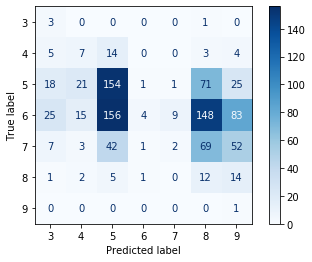

In [50]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(SVM, 
                              X_test, 
                              y_test, 
                               
                              cmap='Blues',
                              values_format='')

In [55]:
M = confusion_matrix(y_test, SVM.predict(X_test))
M

array([[  3,   0,   0,   0,   0,   1,   0],
       [  5,   7,  14,   0,   0,   3,   4],
       [ 18,  21, 154,   1,   1,  71,  25],
       [ 25,  15, 156,   4,   9, 148,  83],
       [  7,   3,  42,   1,   2,  69,  52],
       [  1,   2,   5,   1,   0,  12,  14],
       [  0,   0,   0,   0,   0,   0,   1]])

In [58]:
w = M.diagonal()
w = list(w.flatten())
TN = w[0]
TN

3

In [59]:
3+7+154+4+2+12+1


183

In [60]:
def sumoflist(l):    
            total = 0    
            for i in l:
                total +=i
            return total

In [61]:
sumoflist(w)

183

In [64]:
sumR = M.sum(axis=1)
sumR = list(sumR.flatten())
FP = sumR[0]-TN
FP

1

In [ ]:
        def sumoflist(l):    
            total = 0    
            for i in l:
                total +=i
            return total
    
            # Przekątna macierzy:
        import numpy as np
        w = M.diagonal()
        w = list(w.flatten())
        TN = w[n]
   
        # Suma wierszy macierzy:
        sumR = M.sum(axis=1)
        sumR = list(sumR.flatten())
        FP = sumR[n]-TN
    
        # Suma kolumn macierzy:
        sumC = M.sum(axis=0) 
        sumC = list(sumC.flatten())
        FN = sumC[n]-TN
        TP = sumoflist(w) - TN
    
        Recall = np.round(TP/(TP+FN),decimals=3)
        Precision = np.round(TP/(TP+FP),decimals=3)
        F1 = np.round((2*(Precision*Recall))/(Precision+Recall),decimals=3)
        FPR = np.round(FP/(FP + TN),decimals=3)
        TPR = np.round(TP/(TP + FN),decimals=3)
        FNR = np.round(FN/(TP + FN),decimals=3)
        SPEC = np.round(TN/(TN + FP),decimals=3)